In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [2]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# df = df.rename(columns={'Annual Income (k$)':'income', "Spending Score (1-100)":'score'})
df.rename(columns={'Annual Income (k$)':'income', "Spending Score (1-100)":'score'}, inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = df.drop('CustomerID', axis=1)

In [8]:
df.describe() #statistical 

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Viz

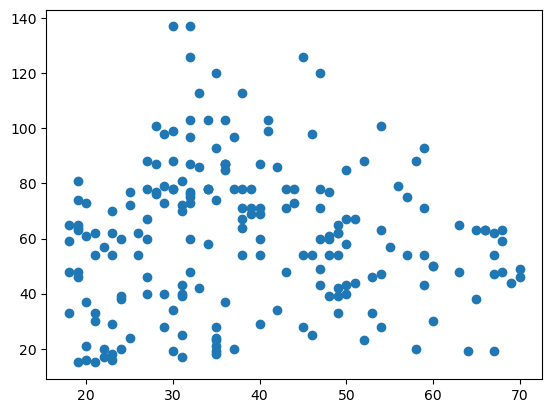

In [9]:
plt.scatter(df['Age'], df.income)

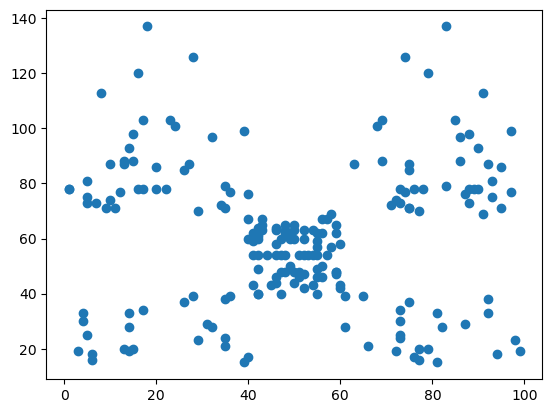

In [10]:
plt.scatter(df.score, df.income)

# pairplot

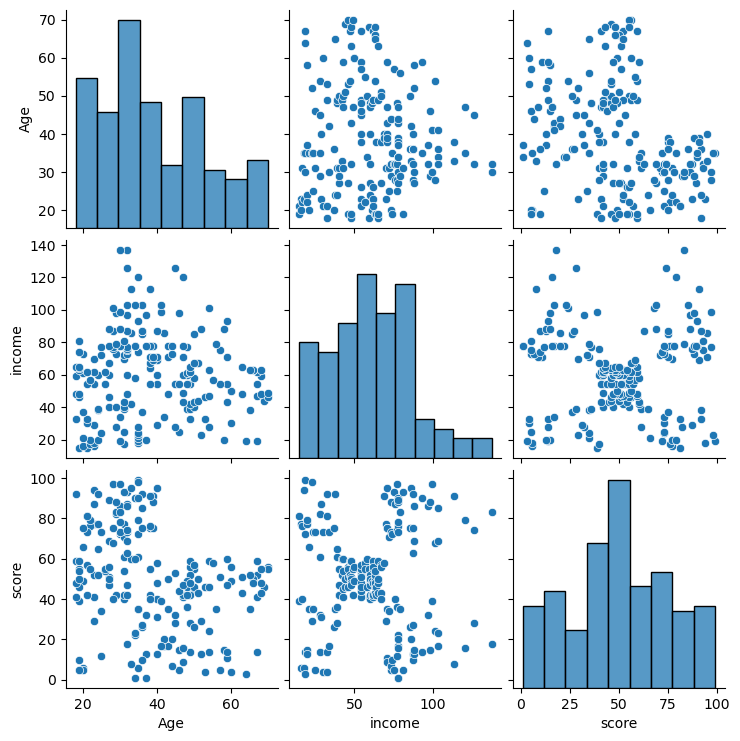

In [11]:
seaborn.pairplot(df[['Age', 'income', 'score']])

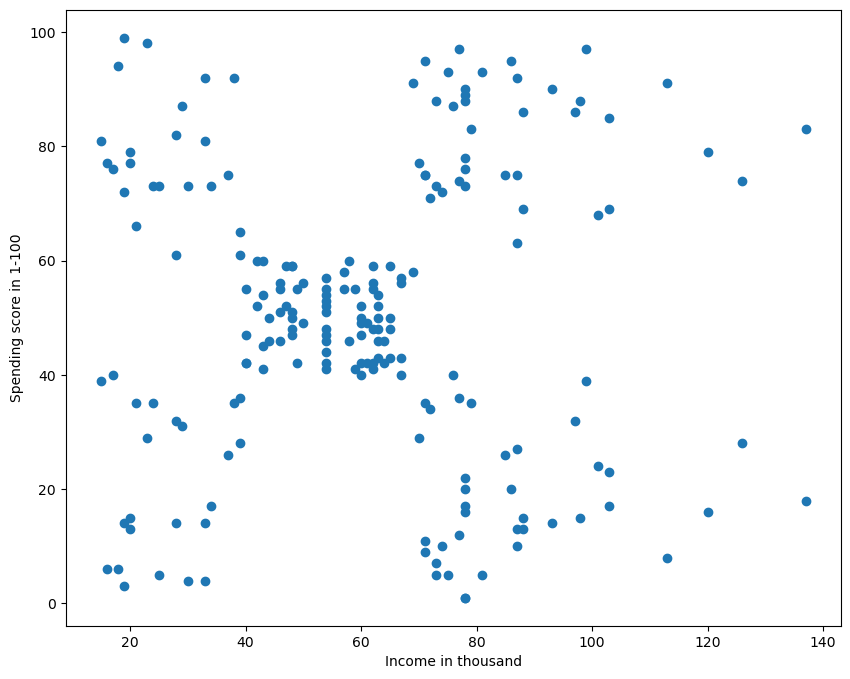

In [12]:
plt.figure(figsize=(10,8))
plt.xlabel('Income in thousand')
plt.ylabel('Spending score in 1-100')
plt.scatter(df.income, df.score)

# KMeans Cluster

In [13]:
from sklearn.cluster import KMeans

In [14]:
km1 = KMeans() # n_clusters=8

In [15]:
predicted = km1.fit_predict(df[['income', 'score']]) #fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']])

In [16]:
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2,
       6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [17]:
df['initial_clusters'] =  predicted

In [18]:
df.head()

,Gender,Age,income,score,initial_clusters
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [19]:
center1 = km1.cluster_centers_

In [20]:
center1

array([[ 47.06818182,  50.36363636],
       [ 79.73913043,  13.39130435],
       [ 78.03571429,  81.89285714],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 63.80952381,  47.66666667],
       [108.18181818,  82.72727273]])

In [21]:
km1.predict([[15,45]])

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

# 2D VIZ

In [22]:
df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]
df5 = df[df.initial_clusters == 5]
df6 = df[df.initial_clusters == 6]
df7 = df[df.initial_clusters == 7]

In [23]:
df0.shape

(44, 5)

In [24]:
df1.shape

(23, 5)

In [25]:
df7.shape

(11, 5)

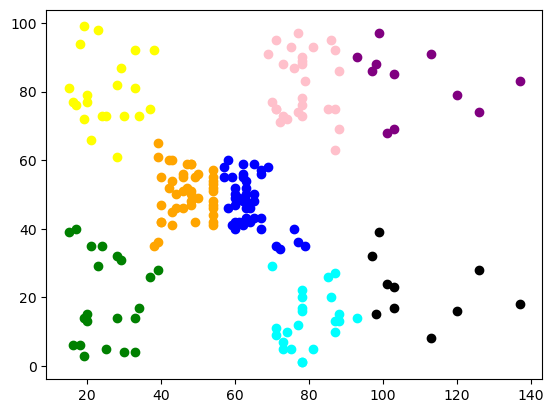

In [26]:
plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

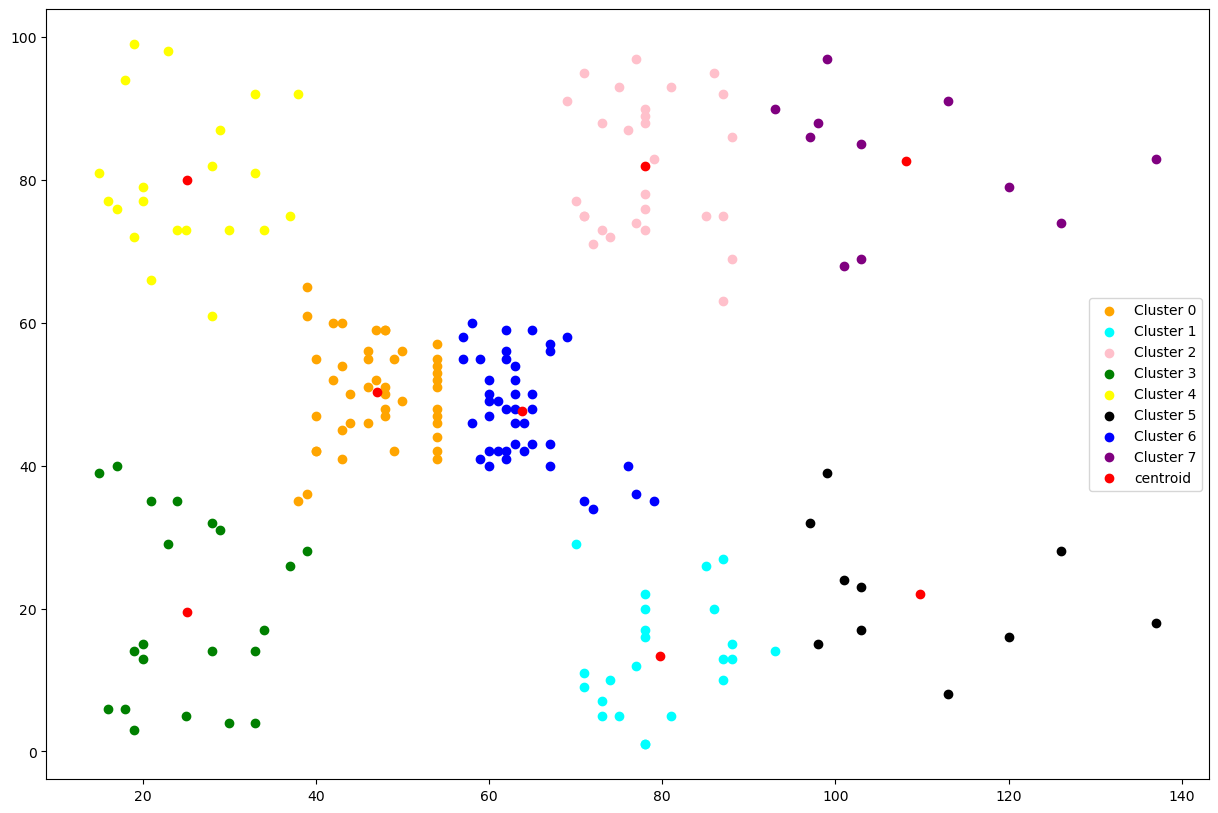

In [27]:
plt.figure(figsize=(15,10))

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()

# Optimization

In [28]:
#Elbow method
#WCSS - Within Clusters Sum of Squares

In [29]:
wcss = []
cluster = range(1,20)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.39431207004,
 25029.253424935883,
 21932.39204424098,
 19657.783608703958,
 17577.687828862054,
 16127.564916706382,
 14264.768695356932,
 13362.106470722261,
 11991.088674388673,
 11588.246845388874,
 9993.094393841451,
 9271.545813075812,
 8920.896200351373]

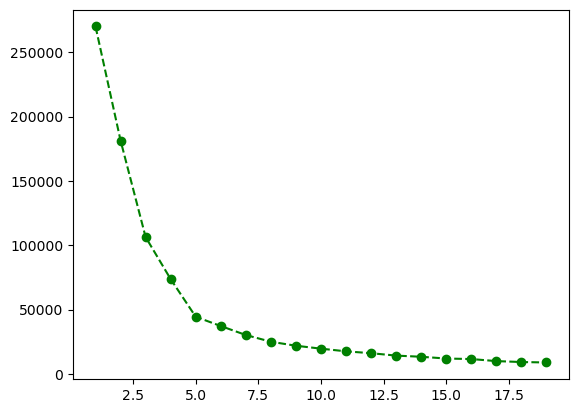

In [31]:
plt.plot(cluster, wcss,'go--')

In [32]:
!pip install kneed

In [33]:
from kneed import KneeLocator

In [34]:
kn = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [35]:
kn.knee

5

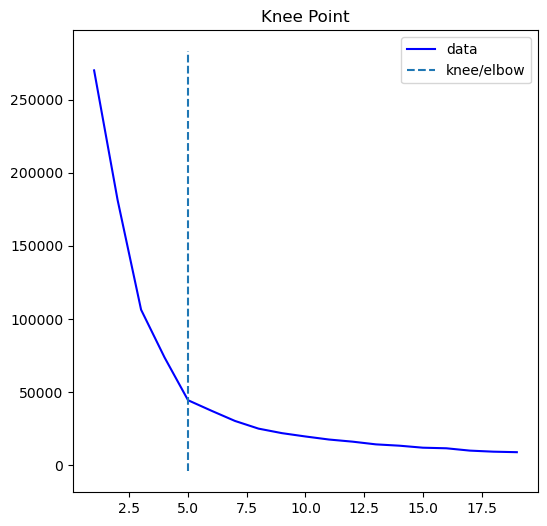

In [36]:
kn.plot_knee()

# After

In [37]:
km3 = KMeans(n_clusters=5)
predicted = km3.fit_predict(df[['income', 'score']]) #fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']])

In [38]:
df['initial_clusters'] = predicted

In [39]:
center1 = km3.cluster_centers_

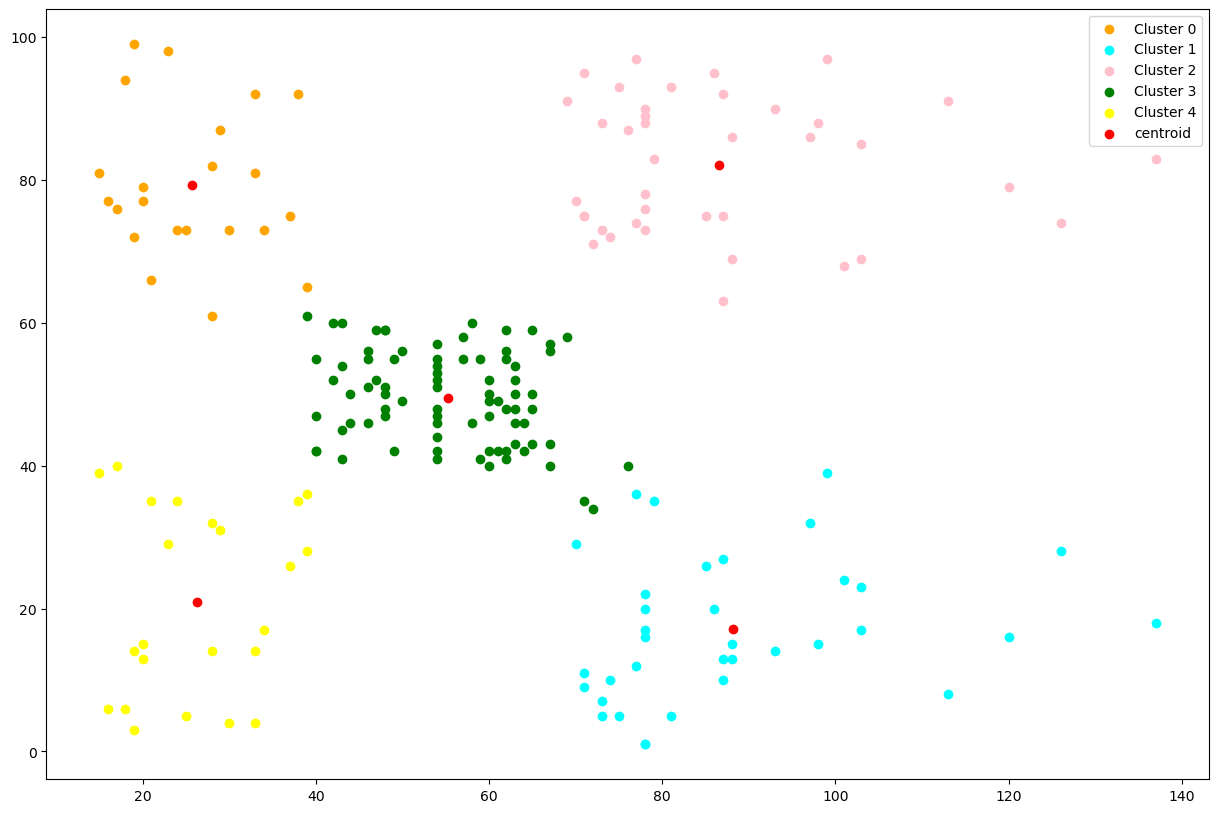

In [40]:
plt.figure(figsize=(15,10))

df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html